In [1]:
!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2025-08-20 11:53:30--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.193.24.207, 2600:1417:76:993::317f, 2600:1417:76:98b::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.193.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   111MB/s    in 5.5s    

2025-08-20 11:53:36 (143 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




In [4]:

cat_dir = "/content/PetImages/Cat"
dog_dir = "/content/PetImages/Dog"



In [5]:

img_size = 32

data = []
labels = []



In [7]:
limit_per_class = 5000

for i, file in enumerate(os.listdir(cat_dir)[:limit_per_class]):
    img = cv2.imread(os.path.join(cat_dir, file), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    data.append(img.flatten())
    labels.append(0)  # Cat = 0

for i, file in enumerate(os.listdir(dog_dir)[:limit_per_class]):
    img = cv2.imread(os.path.join(dog_dir, file), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    data.append(img.flatten())
    labels.append(1)  # Dog = 1


In [8]:
X = np.array(data) / 255.0
y = np.array(labels)



In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = SVC(kernel="rbf", gamma="scale", C=10 )
model.fit(X_train, y_train)


SVC(C=10)

In [11]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 92.40%


In [14]:
def predict_image(model, img_path, img_size=32):
    # Read image in grayscale (same preprocessing as training)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))   # resize
    img_flat = img.flatten().astype("float32") / 255.0  # flatten + normalize

    # Reshape into (1, -1) because model expects 2D input
    img_flat = img_flat.reshape(1, -1)

    # Prediction
    pred = model.predict(img_flat)[0]

    if pred == 0:
        return "Cat 🐱"
    else:
        return "Dog 🐶"

Prediction: Dog 🐶


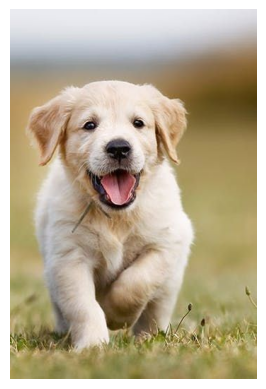

In [24]:
import matplotlib.pyplot as plt
test_img = "/content/Dog.jpeg"
print("Prediction:", predict_image(model, test_img))

img = cv2.imread(test_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

plt.show()

Prediction: Cat 🐱


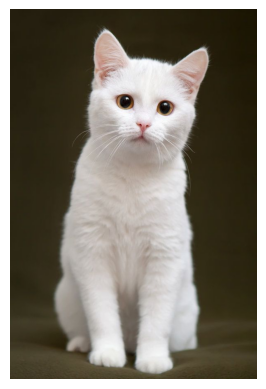

In [25]:
test_img = "/content/Parsian Cat.jpeg"
print("Prediction:", predict_image(model, test_img))
img = cv2.imread(test_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

plt.show()